In [1]:
import numpy as np
import pandas as pd
import pickle
import healpy as hp
import histlite as hl
import os
import glob

In [2]:
# with open("/home/cjchen/2020-2021/Spring2021/greco_grb/data/gbm/no_healpix_gbm_grb_list.txt", "rb") as fp:   # Unpickling
#     no_healpix_gbm_grb_list = pickle.load(fp)

with open("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/gbm/no_healpix_gbm_grb_list_40.txt", "rb") as fp:   # Unpickling
    no_healpix_gbm_grb_list = pickle.load(fp)

# no_gbm_list = ['GRB180205184', 'GRB180128252', 'GRB171119992', 'GRB170416583', 'GRB170203486', 'GRB170113420', 'GRB161218222', 'GRB161121186', 'GRB161020024', 'GRB160314929', 'GRB160220868', 'GRB151218857', 'GRB150917148', 'GRB150618674', 'GRB150513856', 'GRB150411026', 'GRB150326542', 'GRB150325696', 'GRB140912664', 'GRB140825980', 'GRB140711691', 'GRB140628704', 'GRB140501139', 'GRB140219319', 'GRB140115899', 'GRB140109877', 'GRB131029990', 'GRB130925164', 'GRB130909817', 'GRB130908677', 'GRB120817168', 'GRB120624309', 'GRB120513531']


In [3]:
# grbweb = pd.read_pickle("/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbweb/grb_grbweb.pkl")
grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbweb/grb_grbweb_2297.pkl")
grbweb

,grb_name,grb_name_GBM,ra,dec,source_uncertainty,mjd_start,t100,t90,gbm,ra_source,decl_source,pos_error_source,fluence,redshift,t_center
0,GRB200529B,GRB200529504,337.200000,55.230000,3.506136,58998.503432,0.000539,0.000539,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,5.001000e-06,NaN,58998.503701
1,GRB200529A,GRB200529039,238.763917,-11.073639,0.000233,58998.039294,0.001004,0.000984,0,Swift,Swift,Swift,4.847700e-06,NaN,58998.039796
2,GRB200528A,GRB200528436,176.637458,58.192583,0.000194,58997.435683,0.000700,0.000655,0,Swift,Swift,Swift,2.905200e-05,NaN,58997.436033
3,GRB200525A,GRB200525611,20.610000,-8.520000,4.536708,58994.611328,0.001081,0.001081,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,8.858900e-06,NaN,58994.611869
4,GRB200524A,GRB200524211,212.750000,60.966667,0.100000,58993.211115,0.000445,0.000437,0,IPN,IPN,IPN,1.396400e-05,1.256,58993.211338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,GRB120429B,GRB120429484,133.040000,-32.230000,6.505598,56046.484059,0.000178,0.000178,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,2.367800e-06,NaN,56046.484148
2293,GRB120429A,GRB120429003,165.980000,-8.760000,9.378528,56046.002860,0.000019,0.000019,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,2.793700e-07,NaN,56046.002869
2294,GRB120427B,GRB120427153,114.700000,50.210000,15.003090,56044.153189,0.000264,0.000264,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,6.805100e-07,NaN,56044.153321
2295,GRB120427A,GRB120427054,224.935000,29.311000,NaN,56044.053773,0.000089,0.000062,0,"GCN_circulars,IPN Triangulation","GCN_circulars,IPN Triangulation",None,7.429900e-06,NaN,56044.053818


## GRBs having no GBM healpix maps

In [4]:
no_gbm_name_mask = grbweb['grb_name_GBM'].isnull()
has_gbm_name_but_no_healpix_mask = grbweb['grb_name_GBM'].isin(no_healpix_gbm_grb_list)
mask = np.logical_or(no_gbm_name_mask, has_gbm_name_but_no_healpix_mask)


In [5]:
grbweb['hasHealpix'] =  np.logical_not(mask)

In [6]:
grbweb.head()

,grb_name,grb_name_GBM,ra,dec,source_uncertainty,mjd_start,t100,t90,gbm,ra_source,decl_source,pos_error_source,fluence,redshift,t_center,hasHealpix
0,GRB200529B,GRB200529504,337.200000,55.230000,3.506136,58998.503432,0.000539,0.000539,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000005,NaN,58998.503701,True
1,GRB200529A,GRB200529039,238.763917,-11.073639,0.000233,58998.039294,0.001004,0.000984,0,Swift,Swift,Swift,0.000005,NaN,58998.039796,True
2,GRB200528A,GRB200528436,176.637458,58.192583,0.000194,58997.435683,0.000700,0.000655,0,Swift,Swift,Swift,0.000029,NaN,58997.436033,True
3,GRB200525A,GRB200525611,20.610000,-8.520000,4.536708,58994.611328,0.001081,0.001081,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000009,NaN,58994.611869,True
4,GRB200524A,GRB200524211,212.750000,60.966667,0.100000,58993.211115,0.000445,0.000437,0,IPN,IPN,IPN,0.000014,1.256,58993.211338,True


## How many: all vs. GBM_located vs. notGBM_located

GBM_located: GBM is the sole satellite detecting those GRBs

In [7]:
print("all vs. GBM_located vs. notGBM_located")
grbweb.shape[0], np.sum(grbweb.gbm==1), np.sum(grbweb.gbm==0)

all vs. GBM_located vs. notGBM_located


(2297, 1367, 930)

## How many: all vs. hasHealpix vs. noHealpix
but no every healpix will be used. Only GBM_GRBs and 52 PIN GRBs will use their healpix maps

In [8]:
print("all, hasHealpix, noHealpix")
grbweb.shape[0], np.sum(grbweb.hasHealpix), np.sum(~grbweb.hasHealpix)


all, hasHealpix, noHealpix


(2297, 1859, 438)

## How many: GBM_located vs. hasHealpix vs. noHealpix

In [9]:
print("GBM_located vs. hasHealpix vs. noHealpix")
np.sum(grbweb.gbm==1), np.sum(np.logical_and(grbweb.gbm==1, grbweb.hasHealpix)), np.sum(np.logical_and(grbweb.gbm==1, ~grbweb.hasHealpix))


GBM_located vs. hasHealpix vs. noHealpix


(1367, 1338, 29)

## Among GBM_located && noHealpix GRBs: NaN. vs. well vs. poor

In [10]:
print("NaN, well, poor")
mask = np.logical_and(grbweb.gbm == 1, ~grbweb.hasHealpix)
np.sum(np.logical_and(mask, np.isnan(grbweb.source_uncertainty))), np.sum(np.logical_and(mask, grbweb.source_uncertainty < 1)), np.sum(np.logical_and(mask, grbweb.source_uncertainty >= 1))


NaN, well, poor


(29, 0, 0)

## Among notGBM_located: All. vs. hasSU vs. noSU

In [11]:
mask = grbweb.gbm == 0 
grbweb[mask].groupby(['ra_source']).size()

ra_source
Fermi_LAT                           72
GCN_circulars,Fermi LAT Det          1
GCN_circulars,INTEGRAL               1
GCN_circulars,IPN Triangulation     54
GCN_circulars,MAXI Det               1
GCN_circulars,Optical                7
GCN_circulars,Swift-XRT Other        5
IPN                                135
Swift                              654
dtype: int64

In [12]:
print("All, hasSU, noSU")
mask = grbweb.gbm == 0
np.sum(mask), np.sum(mask & (~np.isnan(grbweb.source_uncertainty))), np.sum(mask & np.isnan(grbweb.source_uncertainty))


All, hasSU, noSU


(930, 861, 69)

## Among notGBM_hasSU_GRBs: All. vs. well vs. poor

In [13]:
print("nonGBM_hasSU, well, poor")
mask = (grbweb.gbm == 0) & (~np.isnan(grbweb.source_uncertainty))                         
np.sum(mask), np.sum(mask & (grbweb.source_uncertainty<=1)), np.sum(mask & (grbweb.source_uncertainty>1))


nonGBM_hasSU, well, poor


(861, 812, 49)

## Among notGBM_noSU_GRBs: group by ra_source (also pos_error_source)

In [14]:
mask = (grbweb.gbm == 0) & (np.isnan(grbweb.source_uncertainty)) 
grbweb[mask].groupby('ra_source').size()

ra_source
GCN_circulars,Fermi LAT Det         1
GCN_circulars,INTEGRAL              1
GCN_circulars,IPN Triangulation    54
GCN_circulars,MAXI Det              1
GCN_circulars,Optical               7
GCN_circulars,Swift-XRT Other       5
dtype: int64

## Confirm hasHealpix feild with healpix .fit files

In [15]:
# in_folder = "/home/cjchen/2020-2021/Spring2021/greco_grb/data/gbm/healpix"
in_folder = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/gbm/healpix"
for idx in grbweb.index: 
    if grbweb.hasHealpix[idx]:
        files = glob.glob("{}/*_healpix_*{}*.fit".format(in_folder, grbweb.grb_name_GBM[idx][3:]))
        if len(files) == 0:
            print(grbweb.grb_name_GBM + " has no healpix .fit file.")
        elif len(files) > 1:
            print(grbweb.grb_name_GBM + " has more than one .fit files.")
        else :
            pass
        
# IF no printouts, then likely everything is correct
# Meaning: all GRBs that is classified as hasHealpix=True does has one and only one healpix file

## Put / store everything together

For GBM-GRBs (with `gbm=1`, 1367 GRBs), use healpix maps if they exists (1338 GRBs), discard GRBs that do not have a healpix map (29 GBM-GRBs). \
For non-GBM GRBs (with `gbm=0`, 930 GRBs)

- When `source_uncertainty` is NaN (69 GRBs), manually gather information from circulars
  - If `GCN_circulars,IPN Triangulation` (54 GRBs) and `hasHealpix` (52 GRBs), use healpix maps
  - Else (15 GRBs), create fake maps with human-input pos_error following the RULES
- When `source_uncertainty` is not NaN (861 GRBs), use those numbers to create fake maps following the RULES
  - Note: For `pos_error_source==IPN`, the source_uncertainties have been changed to the half of the original value during the SQL process.


In other words, after some process:
- ~if `gbm==1 AND not hasHealpix`~ won't exist in the below grbweb2268 dataframe
- elif (`gbm==1` OR `ra_source==GCN_circulars,IPN Triangulation`) AND `hasHealpix` ==> use healpix maps
- else ==> use `source_uncertainty`


RULES:
- When `source_uncertainty <= 1`: 1 degree is used
- When `source_uncertainty > 1`: `source_uncertainty` itself is used



In [25]:
grbweb2268 = grbweb.drop(axis=0, index=grbweb[(grbweb.gbm==1) & ~grbweb.hasHealpix].index)
grbweb2268 = grbweb2268.reset_index(drop=True)
grbweb2268.shape

(2268, 16)

In [27]:
grbweb2268

,grb_name,grb_name_GBM,ra,dec,source_uncertainty,mjd_start,t100,t90,gbm,ra_source,decl_source,pos_error_source,fluence,redshift,t_center,hasHealpix
0,GRB200529B,GRB200529504,337.200000,55.230000,3.506136,58998.503432,0.000539,0.000539,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,5.001000e-06,NaN,58998.503701,True
1,GRB200529A,GRB200529039,238.763917,-11.073639,0.000233,58998.039294,0.001004,0.000984,0,Swift,Swift,Swift,4.847700e-06,NaN,58998.039796,True
2,GRB200528A,GRB200528436,176.637458,58.192583,0.000194,58997.435683,0.000700,0.000655,0,Swift,Swift,Swift,2.905200e-05,NaN,58997.436033,True
3,GRB200525A,GRB200525611,20.610000,-8.520000,4.536708,58994.611328,0.001081,0.001081,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,8.858900e-06,NaN,58994.611869,True
4,GRB200524A,GRB200524211,212.750000,60.966667,0.100000,58993.211115,0.000445,0.000437,0,IPN,IPN,IPN,1.396400e-05,1.256,58993.211338,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,GRB120429B,GRB120429484,133.040000,-32.230000,6.505598,56046.484059,0.000178,0.000178,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,2.367800e-06,NaN,56046.484148,True
2264,GRB120429A,GRB120429003,165.980000,-8.760000,9.378528,56046.002860,0.000019,0.000019,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,2.793700e-07,NaN,56046.002869,True
2265,GRB120427B,GRB120427153,114.700000,50.210000,15.003090,56044.153189,0.000264,0.000264,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,6.805100e-07,NaN,56044.153321,True
2266,GRB120427A,GRB120427054,224.935000,29.311000,NaN,56044.053773,0.000089,0.000062,0,"GCN_circulars,IPN Triangulation","GCN_circulars,IPN Triangulation",None,7.429900e-06,NaN,56044.053818,True


In [28]:
"""
human-input numbers
"""
humanInput = pd.read_csv("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbweb/03_humanInputGRBandSU.csv")
humanInput.head()

,grb_name,source_uncertainty,potential_pos_error_source,link
0,GRB120512A,0.0167,"GCN_circulars,INTEGRAL",https://gcn.gsfc.nasa.gov/gcn3/13300.gcn3
1,GRB150424B,0.1300,"GCN_circulars,MAXI Det",https://gcn.gsfc.nasa.gov/gcn3/17746.gcn3
2,GRB190606A,3.0000,"GCN_circulars,Fermi LAT Det",https://gcn.gsfc.nasa.gov/gcn3/24761.gcn3
3,GRB180806A,0.9999,"GCN_circulars,Swift-XRT Other",NaN
4,GRB150220A,0.5000,"GCN_circulars,Swift-XRT Other",https://www.swift.ac.uk/ToO_GRBs/00020484/


In [29]:
grbweb2268.loc[grbweb2268.grb_name.isin(humanInput.grb_name), 'source_uncertainty'] = humanInput['source_uncertainty'].values
grbweb2268.loc[grbweb2268.grb_name.isin(humanInput.grb_name), 'pos_error_source'] = 'circular'
grbweb2268.loc[grbweb2268.grb_name.isin(humanInput.grb_name)].head()


,grb_name,grb_name_GBM,ra,dec,source_uncertainty,mjd_start,t100,t90,gbm,ra_source,decl_source,pos_error_source,fluence,redshift,t_center,hasHealpix
252,GRB190606A,GRB190606080,76.54000,-0.680000,0.0167,58640.079905,0.000049,0.000003,0,"GCN_circulars,Fermi LAT Det","GCN_circulars,Fermi LAT Det",circular,0.000004,NaN,58640.079929,True
380,GRB181222B,GRB181222841,312.27080,22.880000,0.1300,58474.841372,0.000040,0.000007,0,"GCN_circulars,Optical",None,circular,0.000036,NaN,58474.841392,True
429,GRB181008B,GRB181008877,118.80275,-41.753333,3.0000,58399.876470,0.002599,0.002599,0,"GCN_circulars,Optical","GCN_circulars,Optical",circular,0.000026,NaN,58399.877769,True
478,GRB180806A,GRB180806944,11.55360,24.337000,0.9999,58336.943734,0.000181,0.000181,0,"GCN_circulars,Swift-XRT Other","GCN_circulars,Swift-XRT Other",circular,0.000022,NaN,58336.943825,True
844,GRB170529A,None,164.49900,-17.934000,0.5000,57902.295579,0.000510,0.000388,0,"GCN_circulars,IPN Triangulation","GCN_circulars,IPN Triangulation",circular,NaN,NaN,57902.295834,False


In [30]:
def createFakeHealpix(ra, dec, source_uncertainty, nside=128, deg=True, profile='top-hat'):
    if deg:
        ra = np.deg2rad(ra)
        dec = np.deg2rad(dec)
        source_uncertainty = np.deg2rad(source_uncertainty)
        
    if source_uncertainty < np.radians(1.0):
        source_uncertainty = np.radians(1.0)                    # Scan minimum of 1 degree around source
    
    if profile == 'top-hat':
        theta = np.pi/2. - dec                                  # Convert to healpy stuff
        phi = ra
        probs = np.zeros(hp.pixelfunc.nside2npix(nside))        # Array of zeros with length from nside
        pixel = hp.pixelfunc.ang2pix(nside, theta, phi)         # Find the pixel that matches the location of the GRB
        vec = hp.pixelfunc.pix2vec(nside, pixel)                # Find the vector to that pixel
        pixels = hp.query_disc(nside, vec, source_uncertainty)  # Find all the pixels within appropriate degrees of that pixel
        probs[pixels] = 1.                                      # Consider all those pixels equally
        probs[pixels] /= np.sum(probs)
        
    ########## not used ##########
    elif profile == 'gaussian':
        m = hl.heal.hist(nside=nside, dec=dec, ra=ra)             # create nside=128 then downgrad to nside=64
        m.map = hp.smoothing(m.map, sigma=source_uncertainty, verbose=False)  # sum==1 automatically
        probs = m.map
        probs = np.maximum(probs, 1e-6 * np.max(probs))         # 3.73e-06 for 5-sigma
    return probs

In [31]:
# in_folder = "/home/cjchen/2020-2021/Spring2021/greco_grb/data/gbm/healpix"
# out_folder = "/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbgbm"
in_folder = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/gbm/healpix"
out_folder = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm"

In [32]:
grbweb2268.index

RangeIndex(start=0, stop=2268, step=1)

In [33]:
probss = []
for idx in grbweb2268.index: 
    isGBM = grbweb2268.gbm[idx] == 1
    hasHealpix = grbweb2268.hasHealpix[idx]
    isIPN = grbweb2268.ra_source[idx] == 'GCN_circulars,IPN Triangulation'
    source_uncertainty = grbweb2268.source_uncertainty[idx]
    
    probs = None
    if (isGBM or isIPN) and hasHealpix:
        gbm_number = grbweb2268.grb_name_GBM[idx][3:]
        files = glob.glob("{}/*_healpix_*{}*.fit".format(in_folder, gbm_number))
#         print(files)
        
        if len(files) > 1 or len(files) == 0:
            print("No healpix OR more than one healpix. idx=", idx)
            break
        probs = hp.read_map(files[0], verbose=False)
        probs = hp.ud_grade(probs, 128)
        probs = probs / probs.sum()
    else:
        if np.isnan(grbweb2268.source_uncertainty[idx]):
            print("NaN source_uncertainty. idx=", idx)
            break
        probs = createFakeHealpix(grbweb2268.ra[idx], 
                                  grbweb2268.dec[idx], 
                                  grbweb2268.source_uncertainty[idx], 
                                  nside=128, 
                                  deg=True, 
                                  profile='top-hat')
        
    probss.append(probs)

grbweb2268['probs'] = probss       

/storage/home/hhive1/cchen641/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


In [34]:
for prob in grbweb2268.probs:
    if np.all((prob == 0.0)):
        print("Empty prob!!!!!")
        break

In [35]:
## grbweb.to_pickle("/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/grbweb_gbm_healpix.pkl")
## grbweb.to_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2297.pkl")
# grbweb2268.to_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2268.pkl")


## store the last column in multiply files for clound computing

In [36]:
# grbweb = pd.read_pickle("/data/user/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/grbweb_gbm_healpix.pkl")
# grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2297.pkl")
grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2268.pkl")


In [37]:
grbweb.head()

,grb_name,grb_name_GBM,ra,dec,source_uncertainty,mjd_start,t100,t90,gbm,ra_source,decl_source,pos_error_source,fluence,redshift,t_center,hasHealpix,probs
0,GRB200529B,GRB200529504,337.200000,55.230000,3.506136,58998.503432,0.000539,0.000539,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000005,NaN,58998.503701,True,"[-1.153176220967179e-09, -1.152561379456255e-0..."
1,GRB200529A,GRB200529039,238.763917,-11.073639,0.000233,58998.039294,0.001004,0.000984,0,Swift,Swift,Swift,0.000005,NaN,58998.039796,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB200528A,GRB200528436,176.637458,58.192583,0.000194,58997.435683,0.000700,0.000655,0,Swift,Swift,Swift,0.000029,NaN,58997.436033,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GRB200525A,GRB200525611,20.610000,-8.520000,4.536708,58994.611328,0.001081,0.001081,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000009,NaN,58994.611869,True,"[7.562859786880475e-10, 7.339820422007179e-10,..."
4,GRB200524A,GRB200524211,212.750000,60.966667,0.100000,58993.211115,0.000445,0.000437,0,IPN,IPN,IPN,0.000014,1.256,58993.211338,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [38]:
grbweb_gbm_df = grbweb.iloc[:,:-1]
grbweb_gbm_df.head()

,grb_name,grb_name_GBM,ra,dec,source_uncertainty,mjd_start,t100,t90,gbm,ra_source,decl_source,pos_error_source,fluence,redshift,t_center,hasHealpix
0,GRB200529B,GRB200529504,337.200000,55.230000,3.506136,58998.503432,0.000539,0.000539,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000005,NaN,58998.503701,True
1,GRB200529A,GRB200529039,238.763917,-11.073639,0.000233,58998.039294,0.001004,0.000984,0,Swift,Swift,Swift,0.000005,NaN,58998.039796,True
2,GRB200528A,GRB200528436,176.637458,58.192583,0.000194,58997.435683,0.000700,0.000655,0,Swift,Swift,Swift,0.000029,NaN,58997.436033,True
3,GRB200525A,GRB200525611,20.610000,-8.520000,4.536708,58994.611328,0.001081,0.001081,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000009,NaN,58994.611869,True
4,GRB200524A,GRB200524211,212.750000,60.966667,0.100000,58993.211115,0.000445,0.000437,0,IPN,IPN,IPN,0.000014,1.256,58993.211338,True


In [39]:
healpix_df = grbweb[['grb_name','probs']]
healpix_df.head()

,grb_name,probs
0,GRB200529B,"[-1.153176220967179e-09, -1.152561379456255e-0..."
1,GRB200529A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB200528A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GRB200525A,"[7.562859786880475e-10, 7.339820422007179e-10,..."
4,GRB200524A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [40]:
grbweb_gbm_df.head()

,grb_name,grb_name_GBM,ra,dec,source_uncertainty,mjd_start,t100,t90,gbm,ra_source,decl_source,pos_error_source,fluence,redshift,t_center,hasHealpix
0,GRB200529B,GRB200529504,337.200000,55.230000,3.506136,58998.503432,0.000539,0.000539,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000005,NaN,58998.503701,True
1,GRB200529A,GRB200529039,238.763917,-11.073639,0.000233,58998.039294,0.001004,0.000984,0,Swift,Swift,Swift,0.000005,NaN,58998.039796,True
2,GRB200528A,GRB200528436,176.637458,58.192583,0.000194,58997.435683,0.000700,0.000655,0,Swift,Swift,Swift,0.000029,NaN,58997.436033,True
3,GRB200525A,GRB200525611,20.610000,-8.520000,4.536708,58994.611328,0.001081,0.001081,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000009,NaN,58994.611869,True
4,GRB200524A,GRB200524211,212.750000,60.966667,0.100000,58993.211115,0.000445,0.000437,0,IPN,IPN,IPN,0.000014,1.256,58993.211338,True


In [41]:
# # grbweb_gbm_df.to_pickle("/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/grbweb_gbm_noHeaplix.pkl")
# # grbweb_gbm_df.to_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_noHeaplix_2297.pkl")
# grbweb_gbm_df.to_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_noHealpix_2268.pkl")


In [42]:
# for idx in healpix_df.index:
#     grb_name = healpix_df.grb_name[idx]
#     prob = healpix_df.probs[idx]
# #     outfile = "/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/healpix/{}_healpix.npy".format(grb_name)
#     outfile = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/healpix/{}_healpix.npy".format(grb_name)
#     np.save(outfile, prob)
    

## nside from 128 to 64

In [43]:
# grbweb = pd.read_pickle("/data/user/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/grbweb_gbm_healpix.pkl")
# grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/icecube/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2297.pkl")
grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/icecube/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2268.pkl")


In [44]:
grbweb.head()

,grb_name,grb_name_GBM,ra,dec,source_uncertainty,mjd_start,t100,t90,gbm,ra_source,decl_source,pos_error_source,fluence,redshift,t_center,hasHealpix,probs
0,GRB200529B,GRB200529504,337.200000,55.230000,3.506136,58998.503432,0.000539,0.000539,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000005,NaN,58998.503701,True,"[-1.153176220967179e-09, -1.152561379456255e-0..."
1,GRB200529A,GRB200529039,238.763917,-11.073639,0.000233,58998.039294,0.001004,0.000984,0,Swift,Swift,Swift,0.000005,NaN,58998.039796,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB200528A,GRB200528436,176.637458,58.192583,0.000194,58997.435683,0.000700,0.000655,0,Swift,Swift,Swift,0.000029,NaN,58997.436033,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GRB200525A,GRB200525611,20.610000,-8.520000,4.536708,58994.611328,0.001081,0.001081,1,Fermi_GBM,Fermi_GBM,Fermi_GBM,0.000009,NaN,58994.611869,True,"[7.562859786880475e-10, 7.339820422007179e-10,..."
4,GRB200524A,GRB200524211,212.750000,60.966667,0.100000,58993.211115,0.000445,0.000437,0,IPN,IPN,IPN,0.000014,1.256,58993.211338,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [45]:
healpix_df = grbweb[['grb_name','probs']].copy()

In [46]:
healpix_df.head()

,grb_name,probs
0,GRB200529B,"[-1.153176220967179e-09, -1.152561379456255e-0..."
1,GRB200529A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB200528A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GRB200525A,"[7.562859786880475e-10, 7.339820422007179e-10,..."
4,GRB200524A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [47]:
np.sum(np.array([len(x) for x in healpix_df.probs]) != 196608)

0

In [48]:
# # individual
# for idx in healpix_df.index:
#     grb_name = healpix_df.grb_name[idx]
#     prob = healpix_df.probs[idx]
#     prob64 = hp.ud_grade(prob, 64)
#     prob64 = prob64 / prob64.sum()
#     if np.all((prob64 == 0.0)):
#         print("Empty prob!!!!!")
#         break
#     outfile = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/healpix/{}_healpix_nside64.npy".format(grb_name)
#     np.save(outfile, prob64)


In [49]:
## all together dataframe
def nside128to64(prob):
    prob64 = hp.ud_grade(prob, 64)
    prob64 = prob64 / prob64.sum()
    return prob64

probs64 = grbweb.probs.apply(nside128to64)
probs64

0       [-4.2069658304774985e-09, -4.227314275624824e-...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [3.3879127299320853e-09, 3.2096421093498023e-0...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
2263    [1.370351922184179e-10, 1.0854630909147633e-10...
2264    [5.63102831090283e-09, 5.587527441325043e-09, ...
2265    [3.8614382998817834e-06, 3.6407336081218085e-0...
2266    [-3.592187493881921e-09, -3.840185949123373e-0...
2267    [-1.667460668470784e-09, -1.871766629377582e-0...
Name: probs, Length: 2268, dtype: object

In [50]:
# grbweb64 = grbweb.copy()
# grbweb64['probs'] = probs64
# # grbweb64.to_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_nside64_2297.pkl")
# grbweb64.to_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_nside64_2268.pkl")


In [ ]:
"""
DONE
"""

In [2]:
"""
Check 52 IPN-noSU-usingHealpix GRBs
"""

'\nCheck 52 IPN-noSU-usingHealpix GRBs\n'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import csky as cy
import healpy as hp

import sys
sys.path.append('../../')
from greco_grb.scripts.utils import *

In [47]:
grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/icecube/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2268.pkl")
ipn52 = grbweb[(grbweb.ra_source=='GCN_circulars,IPN Triangulation') & grbweb.hasHealpix]
human17 = grbweb[grbweb.pos_error_source=='circular']

ipn52.shape, human17.shape

((52, 17), (17, 17))

In [48]:
def estimate_1sigma_error_radius(m):
    ratio = np.sum(m > isf_healpix(m, 0.39)) / hp.get_map_size(m)
    solid_area = ratio * 4 * np.pi
    return np.rad2deg(np.sqrt(solid_area))

In [51]:
ipn52_errs = np.array([estimate_1sigma_error_radius(x) for x in ipn52.probs])
human17_errs = human17.source_uncertainty

In [56]:
ipn52_errs.max()

25.655721413689726

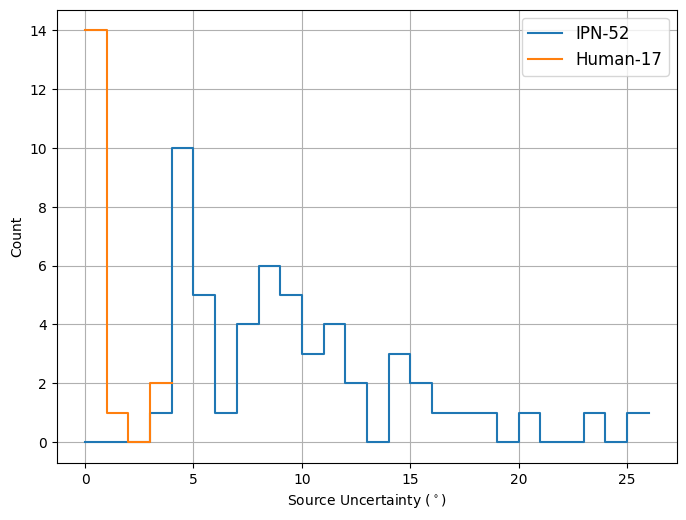

In [63]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
h = hl.hist(ipn52_errs, bins=np.r_[0:27:1])
hl.plot1d (ax, h, label=r'IPN-52')

h = hl.hist(human17_errs, bins=np.r_[0:5:1])
hl.plot1d (ax, h, label=r'Human-17')

ax.set_xlabel(r"Source Uncertainty ($^\circ$)")
ax.set_ylabel(r"Count")
ax.legend(fontsize=12)
ax.grid()

In [ ]:
### for plots only
test128 = np.maximum(1e-6, test128)
test64 = np.maximum(1e-6, test64)

In [ ]:
fig, ax = plt.subplots (subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict())
mesh, cb = sp.plot_map(ax, np.log10(test128), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'spatial prior (log scale)')
plt.title("GRB190612A, n_side=128")
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots (subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict())
mesh, cb = sp.plot_map(ax, np.log10(test64), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'spatial prior (log scale, a.u.)')
plt.tight_layout()